In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import logging

In [3]:
EPOCHS = 500
BATCH_SIZE  = 16

In [4]:
boston_housing_dataset = keras.datasets.boston_housing
(raw_x_train, y_train),(raw_x_test, y_test) = boston_housing_dataset.load_data()  

In [8]:
x_train = (raw_x_train - np.mean(raw_x_train, axis=0)) / np.std(raw_x_train, axis=0)
x_test = (raw_x_test - np.mean(raw_x_test, axis=0)) / np.std(raw_x_test, axis=0)

In [6]:
model = Sequential()
model.add(Dense(64,  activation='relu', input_shape=[13]))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,  activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', 
              metrics=['mean_absolute_error'])
model.summary() # Show network architecture


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model 
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    verbose=False, shuffle=True)

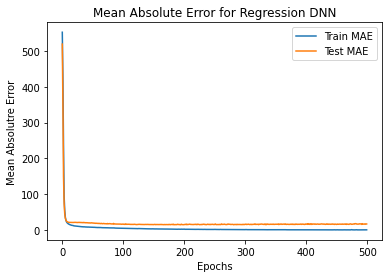

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
line1, = ax.plot(history.history['loss'], label='Train MAE')
line2, = ax.plot(history.history['val_loss'], label='Test MAE')
legend1 = ax.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolutre Error')
plt.title('Mean Absolute Error for Regression DNN')
plt.show()

In [ ]:
# Further avoid overfitting by Regularization and dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(64,  activation='relu',  kernel_regularizer=l2(0.1),
                bias_regularizer=l2(0.1),input_shape=[13]))
model.add(Dropout(0.2))
model.add(Dense(64,  activation='relu',  kernel_regularizer=l2(0.1),
                bias_regularizer=l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(1,  activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', 
              metrics=['mean_absolute_error'])
model.summary()

In [ ]:
# Train the model 
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    verbose=False, shuffle=True)

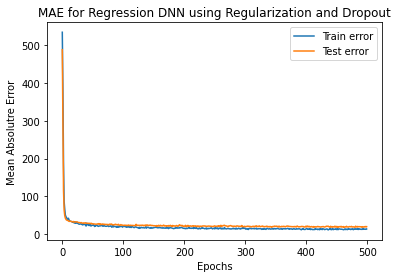

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
line1, = ax.plot(history.history['loss'], label='Train error')
line2, = ax.plot(history.history['val_loss'], label='Test error')
legend1 = ax.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolutre Error')
plt.title('MAE for Regression DNN using Regularization and Dropout')
plt.show()

In [ ]:
# Creating a deeper model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(128,  activation='relu',  kernel_regularizer=l2(0.1),
                bias_regularizer=l2(0.1),input_shape=[13]))
model.add(Dropout(0.2))
model.add(Dense(128,  activation='relu',  kernel_regularizer=l2(0.1),
                bias_regularizer=l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(64,  activation='relu',  kernel_regularizer=l2(0.1),
                bias_regularizer=l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(1,  activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', 
              metrics=['mean_absolute_error'])
model.summary()

In [ ]:
# Train the model 
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    verbose=False, shuffle=True)

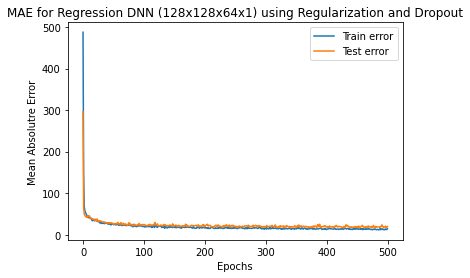

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
line1, = ax.plot(history.history['loss'], label='Train error')
line2, = ax.plot(history.history['val_loss'], label='Test error')
legend1 = ax.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolutre Error')
plt.title('MAE for Regression DNN (128x128x64x1) using Regularization and Dropout')
plt.show()